In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('polynomial_regression_train.csv')
split = 0.8
s = int((dataset.values.shape[0])*split)
x_data = dataset.values[:s,1:6]
y_data = dataset.values[:s,6]
x_cv = dataset.values[s:,1:6]
y_cv = dataset.values[s:,6]

dataset = pd.read_csv('polynomial_regression_test.csv')
x_test = dataset.values[:,1:6]

print(f"x shape: {x_data.shape}, type:{type(x_data)})")
print(f"y shape: {y_data.shape}, type:{type(y_data)})")
dataset.head()

x shape: (38400, 5), type:<class 'numpy.ndarray'>)
y shape: (38400,), type:<class 'numpy.ndarray'>)


,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
0,1,1.718004,-0.201814,0.791965,-0.410485,1.678171
1,2,0.782395,0.897345,-0.059263,-1.725306,-1.363520
2,3,0.619033,0.397670,-0.506356,-0.546682,-1.629186
3,4,1.950046,-1.874789,-0.144491,1.952435,1.908823
4,5,0.097417,0.960511,-1.031956,-1.585839,-1.297509


In [ ]:
x_cv.shape

(9600, 5)

In [ ]:
"""
#feature scaling method 1
x_data/= x_data.max(axis=0)
print(x_data)
"""

'\n#feature scaling method 1\nx_data/= x_data.max(axis=0)\nprint(x_data)\n'

In [ ]:
"""
#feature scaling method 2
x_data = (x_data - np.mean(x_data,axis = 0))/(x_data.max(axis=0)-x_data.min(axis=0))
print(x_data)
"""

'\n#feature scaling method 2\nx_data = (x_data - np.mean(x_data,axis = 0))/(x_data.max(axis=0)-x_data.min(axis=0))\nprint(x_data)\n'

In [ ]:
#feature scaling method 3 (Z-Score)
def f_scale3(x):
    std=np.std(x,axis = 0)
    #std[std==0]=1
    mean=np.mean(x,axis = 0)
    x=(x - mean)/(std+1e-8)
    return x,mean,std

In [ ]:
def add_poly(x, degree):
    x = np.asarray(x)
    x_poly = np.column_stack([np.ones(x.shape[0]), x])
    for i  in range(degree):
        for j in range(degree-i):
            for k in range(degree-i-j):
                for l in range(degree-i-j-k):
                    for m in range(degree-i-j-k-l):
                        if i == 0 and j == 0 and k == 0 and l == 0 and m == 0:
                            continue
                        else:
                            x_poly = np.column_stack([x_poly, (x[:,0]**i)*(x[:,1]**j)*(x[:,2]**k)*(x[:,3]**l)*(x[:,4]**m)])
    return x_poly

In [ ]:
"""
def normal_eq(x, y):
    x_transpose = x.T
    para = np.linalg.inv(x_transpose @ x) @ x_transpose @ y
    return para
"""

def grad_desc_reg(x, y, learning_rate=0.01, iterations=10, regularization="l2", lambda_r=0.1):
    print(x.shape)
    n_samples, n_features = x.shape
    w = np.zeros(n_features,)

    for i in range(iterations):
        y_pred = x @ w
        error = y_pred - y
        gradient = (1 / n_samples) * (x.T @ error)

        if regularization == "l2":
            gradient += (lambda_r / n_samples) * w
        elif regularization == "l1":
            gradient += (lambda_r / n_samples) * np.sign(w)

        w -= learning_rate * gradient
        if i % 100 == 0:
            mse = (1 / (2 * n_samples)) * np.sum(error ** 2)
            if regularization == "l2":
                reg_term = (lambda_r / (2 * n_samples)) * np.sum(w ** 2)
            elif regularization == "l1":
                reg_term = (lambda_r / n_samples) * np.sum(np.abs(w))
            else:
                reg_term = 0
            cost = mse + reg_term
            print(f"Iteration {i}: Cost {cost}")
    return w

In [ ]:
degree = 6
x_poly = add_poly(x_data, degree)
x_poly_normalised,x_mean,x_std= f_scale3(x_poly)
print(x_poly.shape)

(38400, 257)


In [ ]:
learning_rate = 0.1
iterations = 300
lambda_r = 0.01

In [ ]:
x_sorted = np.sort(x_data, axis=0)
x_sorted_poly = add_poly(x_sorted, degree)
print(x_sorted.shape)
print(x_sorted_poly.shape)

(38400, 5)
(38400, 257)


(38400, 257)
Iteration 0: Cost 5.714704226686516e-17
Iteration 100: Cost 3.806275156626264e-18
Iteration 200: Cost 3.1200818513017042e-18

 L2 Regularized Weights: [ 0.00000000e+00  1.25800162e-10  1.47104010e-10 -8.54336952e-11
  1.11427138e-10 -6.33257343e-11 -6.33257343e-11  1.03751714e-09
  2.84115354e-10 -2.69201948e-09  4.50266347e-10  1.11427138e-10
  1.53377902e-09  3.84627883e-11  6.85605097e-10 -6.28251042e-11
 -3.10335302e-10 -5.07064671e-11 -2.02738064e-09  5.03142187e-10
  2.75701559e-10 -1.22034274e-09 -2.95399870e-10 -2.04016648e-10
  3.88160108e-10  3.74417871e-10 -8.54336952e-11 -3.69577497e-10
  3.14004570e-11  4.45403710e-10 -4.92347496e-10  2.25750550e-10
 -3.52914389e-11  3.83677220e-10  3.51175342e-10  3.20895005e-11
 -5.00772812e-10  3.62104445e-10  8.52976356e-10 -4.20084921e-11
 -1.75513049e-10 -3.33580542e-10 -3.38922740e-10  1.20956558e-09
 -1.20310546e-10 -1.26249358e-11 -1.14429059e-09 -2.24082790e-10
 -7.86691527e-10 -1.21840733e-10 -8.05266713e-10 -2.1747

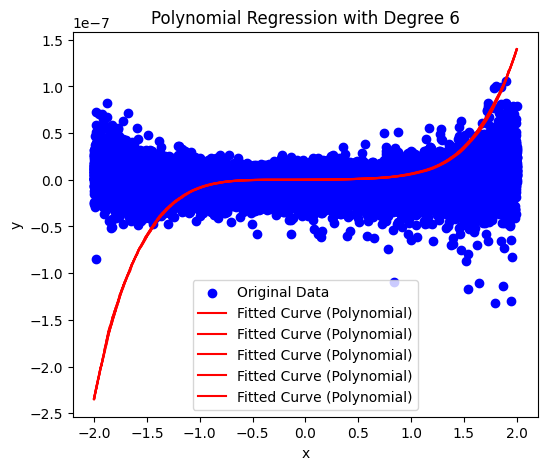

In [ ]:
w_l2 = grad_desc_reg(x_poly_normalised, y_data, learning_rate, iterations, regularization="l2", lambda_r=lambda_r)
print("\n L2 Regularized Weights:", w_l2)
y_pred_l2 = x_sorted_poly @ w_l2

plt.figure(figsize=(6, 5))
print(x_data.shape,y_data.shape)
plt.scatter(x_data[:,0], y_data, color="blue", label="Original Data")
plt.plot(x_sorted, y_pred_l2, color="red", label="Fitted Curve (Polynomial)")
plt.title(f"Polynomial Regression with Degree {degree}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
y_pred_l2_ = x_poly_normalised @ w_l2
SS_res = np.sum((y_data - y_pred_l2_)**2)
SS_tot = np.sum((y_data - np.mean(y_data))**2)
R2 = 1 - (SS_res / SS_tot)
print(f"R^2 Score: {R2:.4f}")

R^2 Score: 0.9494


In [ ]:
x_cv_poly = add_poly(x_cv, degree)
x_cv_poly_normalised = (x_cv_poly-x_mean)/(x_std+1e-10)
y_test_pred = x_cv_poly_normalised @ w_l2

SS_res = np.sum((y_cv - y_test_pred)**2)
SS_tot = np.sum((y_cv - np.mean(y_cv))**2)
R2_test = 1 - (SS_res / SS_tot)
print(f"R^2 Score: {R2_test:.4f}")

# poly,sort,scale (-0.0293) > sort,poly,scale (-0.0342) > scale,poly,sort (-0.1778) > scale,sort,poly (-0.1888) > sort,poly (-0.6345)

R^2 Score: 0.9474


In [ ]:
x_test_poly = add_poly(x_test, degree)
x_test_poly_normalised = (x_test_poly-x_mean)/(x_std+1e-10)
y_test_pred = x_test_poly_normalised @ w_l2

In [ ]:
np.set_printoptions(threshold=np.inf)

print(y_test_pred)

[ 1.14914791e-08 -1.13305430e-08  2.41314436e-10 -2.18500152e-09
 -6.88450763e-09  3.89855606e-09  5.78690207e-10  2.15471129e-08
  2.96812595e-09  6.04887614e-09 -1.33303874e-09  2.40581502e-10
 -1.68220052e-08  8.13518587e-09  1.29684920e-08  2.59901905e-10
 -3.03034508e-09  3.92732134e-09  1.72224983e-08  1.75785987e-08
  4.70160871e-08 -5.66560505e-09  3.76831830e-09 -1.19483131e-08
  1.11322903e-09  1.00293466e-08  6.17549542e-08 -2.51195436e-08
  1.62146879e-08  1.58869554e-09  9.68195909e-10 -8.63006466e-10
 -4.32234495e-10  3.04946344e-08  1.47277728e-09 -3.02392380e-09
 -1.97813146e-09  1.69352487e-09 -1.53670327e-08  3.84608365e-09
 -1.86130509e-09  6.48541441e-09  4.55330021e-09  1.26875768e-09
 -3.13430481e-09  1.50584801e-08  6.40245848e-10 -7.55069522e-09
  1.82661123e-08  4.26165549e-09  7.88424673e-11  1.88432612e-09
  3.32846326e-09 -2.98947437e-09  2.16658941e-08 -7.03634091e-10
  6.73830297e-09  9.82915809e-09  3.84934674e-09 -1.03840131e-08
 -2.15252671e-08  6.72879

In [ ]:
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Predicted"])
y_test_pred_df.to_csv("y_test_pred.csv", index=False)

print("Predictions saved to 'y_test_pred.csv'.")

Predictions saved to 'y_test_pred.csv'.
